In [2]:
# Árvore de Decisão (Decision Tree - DT)
# Árvores de decisão são métodos de aprendizado supervisonado utilizado para classificação e regressão. O objetivo é a criação de um modelo que prevê o valor de uma variável de output a partir de regras de decisão simples criadas a partir dos dados de entrada.

# Vantagens:

# Fácil de entender e interpretar;

# Praticamente dispensa pré processamento de dados. Outras técnicas frequentemente necessitam de normalização e binarização;

# O custo computacional é de ordem logarítma;
# Lida tanto com dados numéricos como categóricos;
# Capaz de lidar com problemas envolvendo múlitplos outputs;

# Utiliza um modelo "caixa branca". As regras criadas pelo modelo são claras e se baseam em regras booleanas. Por outro lado, um modelo "caixa preta" (e.g. em uma rede neural artifical), os resultados podem ser difíceis de serem interpretados.

# Desvantagens:

# Alto risco de overfitting;

# Árvores de decisão se modificam completamente com pequenas variações nos dados de entrada, tornando-as instáveis;

# O processo de criação de cada ramo é feita resolvendo um problema de otimização combinatório de alta complexidade (NP-Hard). Esse problema faz com que métodos heurísticos sejam utilizados (e.g. greedy search) para a criação dos ramos. Essa categoria de métodos não garantem a otimalidade global;

# Árvores de decisão podem ser tendenciosas para classes dominantes. Dessa forma, faz-se necessário o balanceamento dos dados.

# Utilizaremos os dados presentes no arquivo exemplo3.csv para demonstrar o uso do classificador em questão.

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Criação do DataFrame
df = pd.read_csv('C:\\Users\\renan\\OneDrive\\Documentos\\Python Scripts\\Machine_Learning\\exemplo3.csv')

# Separação de inputs e output
X = df.drop('risco', axis=1)
y = df.risco

# Binarização dos inputs categóricos
onehot = OneHotEncoder(sparse=False, drop="first")
X_bin = onehot.fit_transform(X.select_dtypes(include=['object']))

# Normalização dos inputs numéricos
mmscaler = MinMaxScaler()
X_num = mmscaler.fit_transform(X.select_dtypes(exclude=['object']))

# Junção dos inputs
X_all = np.append(X_num, X_bin, axis=1)

# Divisão dos conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=1/3, random_state=42)


c:\Users\renan\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [3]:
# Aplicando o classificador Decision Tree
# Para aplicar o classifador, faremos a importação da classe DecisionTreeClassifier presente no subpacote sklearn.tree.

# Parâmetros mais importantes:

# max_depth: profundidade máxima da árvore;
# max_leaf_nodes: número máximo de folhas.
# Faremos, inicialmente, a criação de uma DT sem pré configuração de parâmetros. Nesse caso, tanto a profundidade como o número de folhas serão incrementadas até que a entropia das folhas seja igual a zero.

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

accuracy_score(y_test, dt.predict(X_test))


0.7529976019184652

In [11]:

# Permitir que a DT se ramifique até gerar folhas de entropia zero pode resultar em falta de generalização (overfitting). Para melhorar o desenpenho do classificador, limitaremos o número de folhas e/ou a profundidade.

# Para acessar a profundidade e o número de folhas da DT utilizamos os comandos get_depth() e get_n_leaves(), respectivamente.

dt.get_depth()


25

In [10]:

dt.get_n_leaves()


315

In [5]:

# Na configuração sem limites, a profundidade total da DT foi igual a 25, resultando no número de folhas igual a 316. Os dois parâmetros são dependentes um do outro. Limitar a profundidade da DT reduz o número de folhas e, reduzir o número de folhas diminui a sua profundidade.

# Faremos um teste configurando os parâmetros como max_depth=14 e max_leaf_nodes=20.

dt2 = DecisionTreeClassifier(max_depth=14, max_leaf_nodes=20)
dt2.fit(X_train, y_train)

accuracy_score(y_test, dt2.predict(X_test))


0.8405275779376499

In [8]:

dt2.get_depth()


9

In [9]:

dt2.get_n_leaves()


20

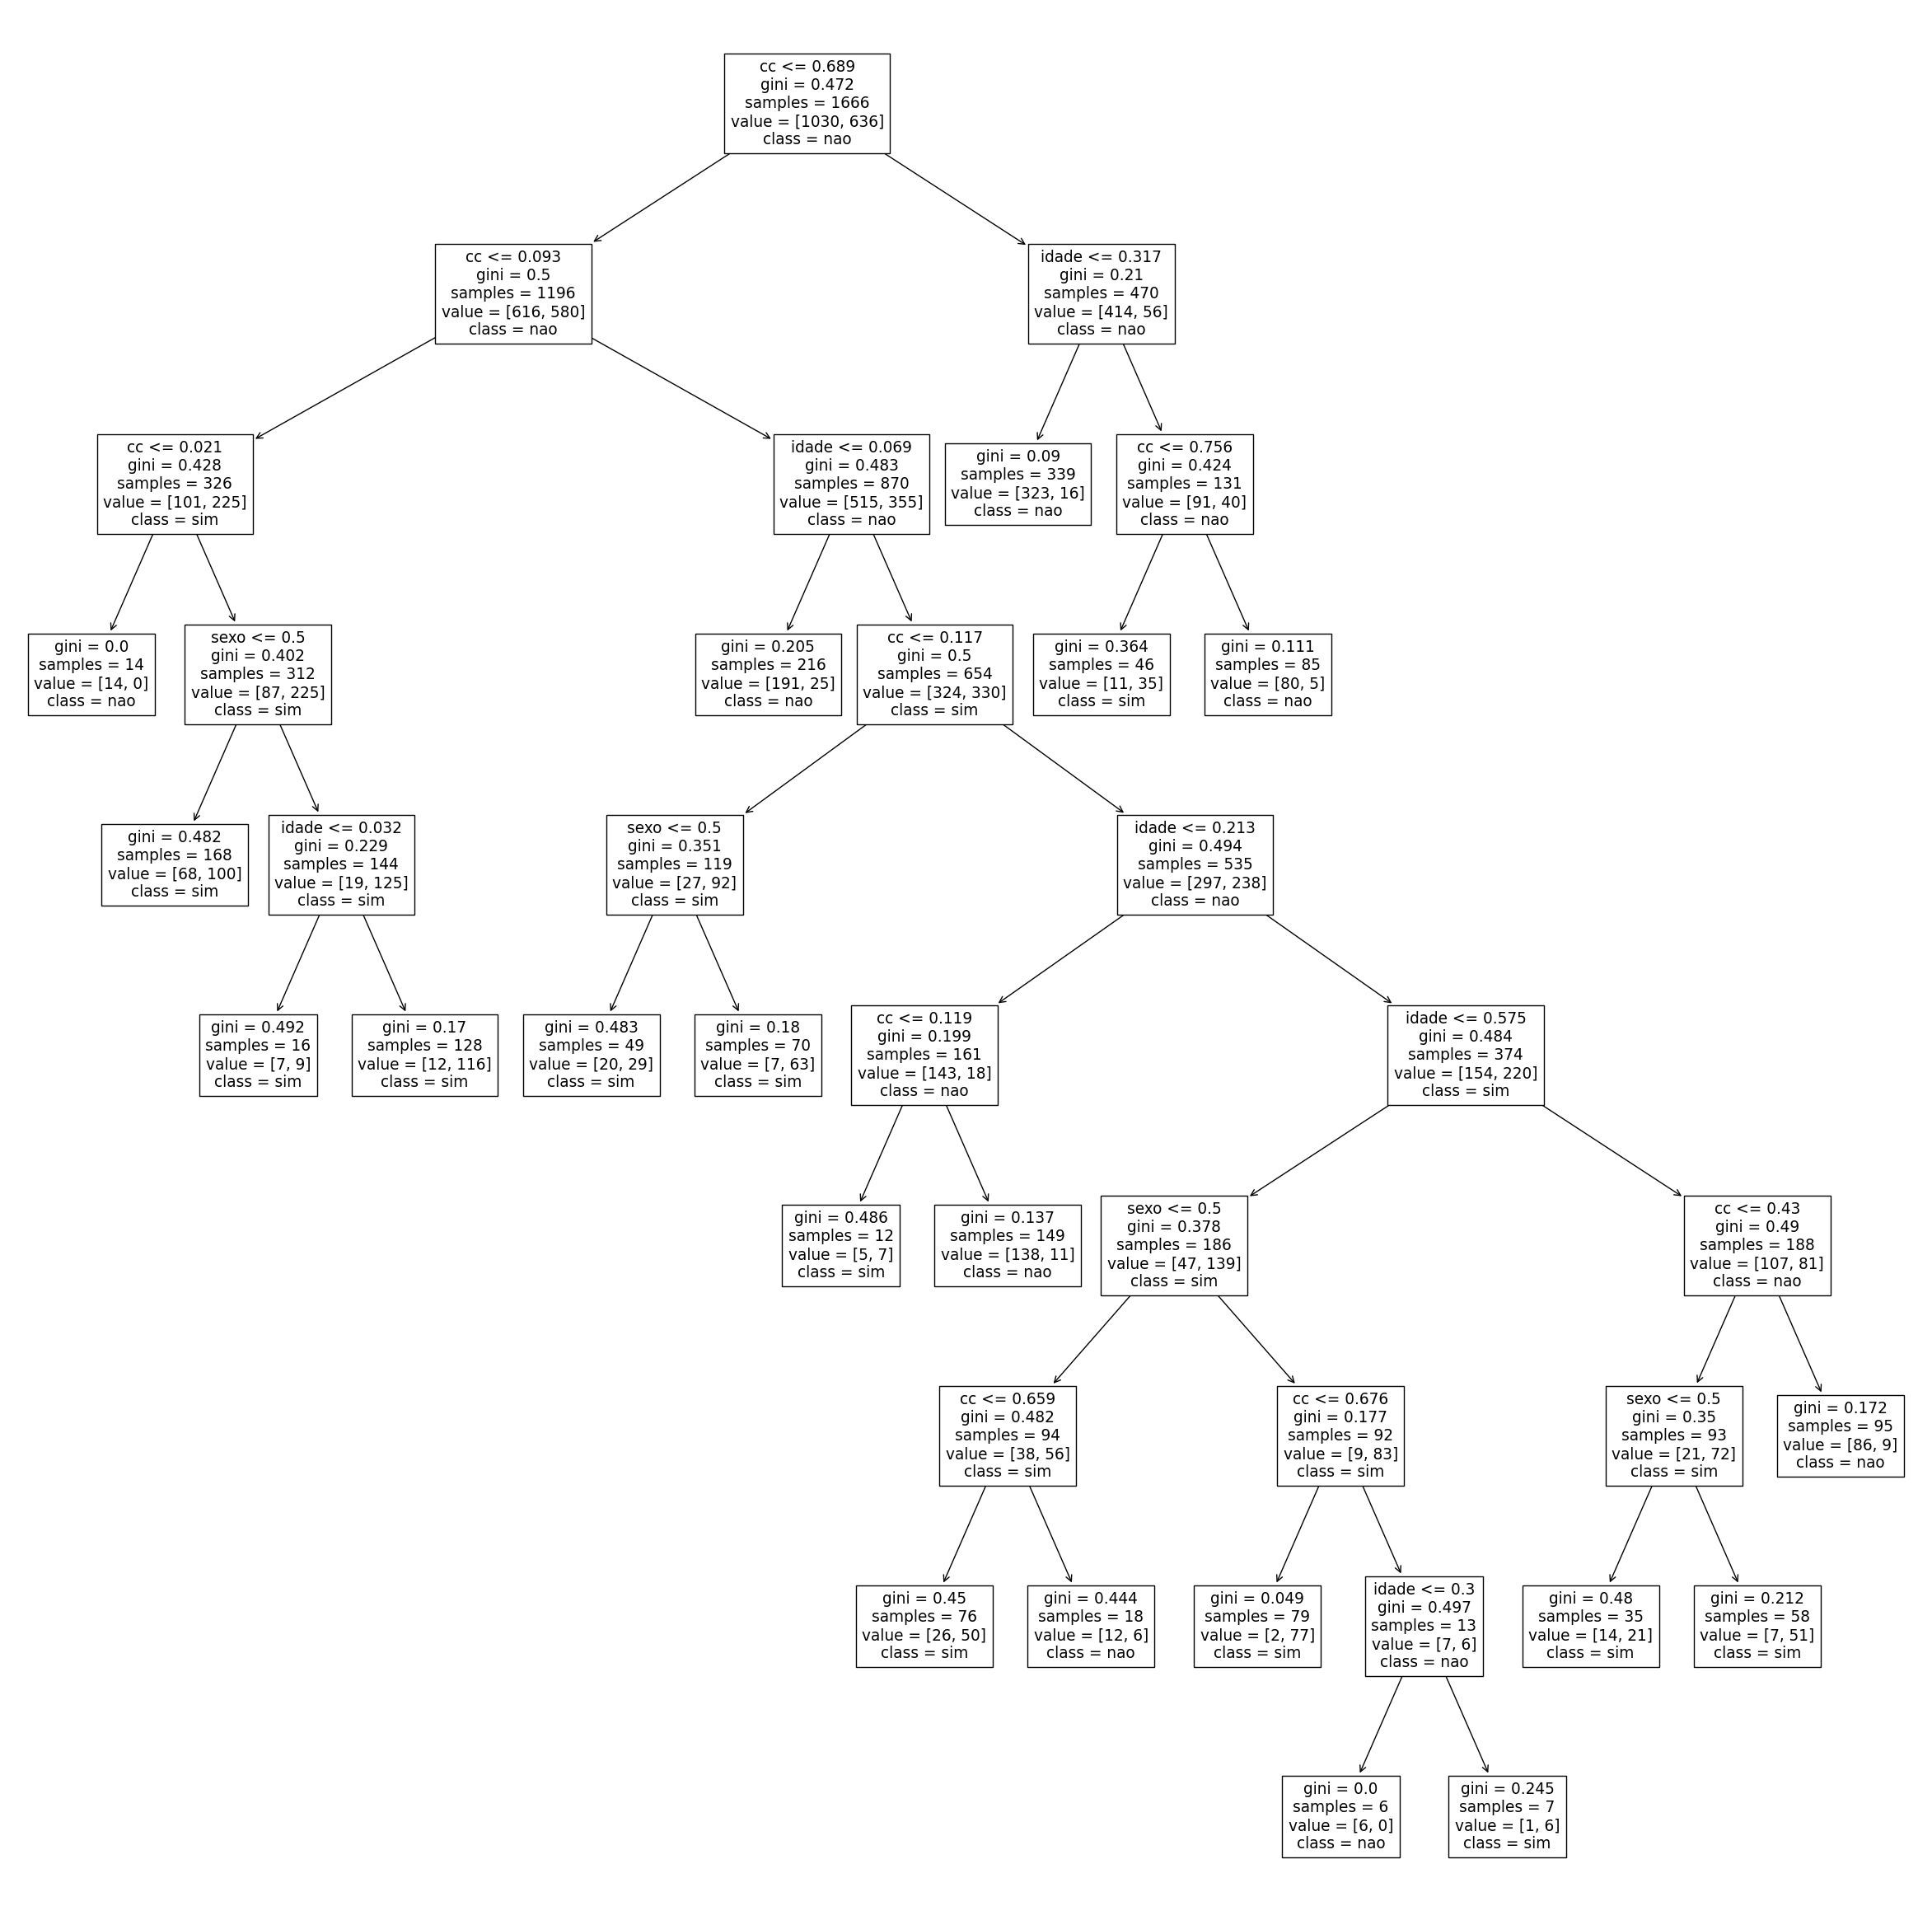

In [7]:

# O código abaixo permite a visualização da árvore de decisão gerada.

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
plot_tree(dt2, feature_names=['idade', 'cc', 'sexo'], class_names=['nao', 'sim'])
plt.show()